In [22]:
# Importing packages
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [12]:
# Importing data
battle_death_df = pd.read_csv("Data/battle_deaths.csv")
armed_conflict_df = pd.read_csv("Data/armed_conflict_19462022.csv")
gdp_df = pd.read_csv("Data/gdp_world.csv", skiprows=4)
mil_spending_df = pd.read_csv("Data/mil_spending.csv", skiprows=4)
education_df = pd.read_csv("Data/education_level.csv", skiprows=4)

# List of country codes to keep (recognized country)
recognized_country_codes = [
    "AFG", "ALA", "ALB", "DZA", "ASM", "AND", "AGO", "AIA", "ATA", "ATG", "ARG", "ARM", "ABW", "AUS", "AUT", "AZE",
    "BHS", "BHR", "BGD", "BRB", "BLR", "BEL", "BLZ", "BEN", "BMU", "BTN", "BOL", "BES", "BIH", "BWA", "BVT", "BRA",
    "IOT", "BRN", "BGR", "BFA", "BDI", "CPV", "KHM", "CMR", "CAN", "CYM", "CAF", "TCD", "CHL", "CHN", "CXR", "CCK",
    "COL", "COM", "COG", "COD", "COK", "CRI", "CIV", "HRV", "CUB", "CUW", "CYP", "CZE", "DNK", "DJI", "DMA", "DOM",
    "ECU", "EGY", "SLV", "GNQ", "ERI", "EST", "SWZ", "ETH", "FLK", "FRO", "FJI", "FIN", "FRA", "GUF", "PYF", "ATF",
    "GAB", "GMB", "GEO", "DEU", "GHA", "GIB", "GRC", "GRL", "GRD", "GLP", "GUM", "GTM", "GGY", "GIN", "GNB", "GUY",
    "HTI", "HMD", "VAT", "HND", "HKG", "HUN", "ISL", "IND", "IDN", "IRN", "IRQ", "IRL", "IMN", "ISR", "ITA", "JAM",
    "JPN", "JEY", "JOR", "KAZ", "KEN", "KIR", "PRK", "KOR", "KWT", "KGZ", "LAO", "LVA", "LBN", "LSO", "LBR", "LBY",
    "LIE", "LTU", "LUX", "MAC", "MDG", "MWI", "MYS", "MDV", "MLI", "MLT", "MHL", "MTQ", "MRT", "MUS", "MYT", "MEX",
    "FSM", "MDA", "MCO", "MNG", "MNE", "MSR", "MAR", "MOZ", "MMR", "NAM", "NRU", "NPL", "NLD", "NCL", "NZL", "NIC",
    "NER", "NGA", "NIU", "NFK", "MKD", "MNP", "NOR", "OMN", "PAK", "PLW", "PSE", "PAN", "PNG", "PRY", "PER", "PHL",
    "PCN", "POL", "PRT", "PRI", "QAT", "REU", "ROU", "RUS", "RWA", "BLM", "SHN", "KNA", "LCA", "MAF", "SPM", "VCT",
    "WSM", "SMR", "STP", "SAU", "SEN", "SRB", "SYC", "SLE", "SGP", "SXM", "SVK", "SVN", "SLB", "SOM", "ZAF", "SGS",
    "SSD", "ESP", "LKA", "SDN", "SUR", "SJM", "SWE", "CHE", "SYR", "TWN", "TJK", "TZA", "THA", "TLS", "TGO", "TKL",
    "TON", "TTO", "TUN", "TUR", "TKM", "TCA", "TUV", "UGA", "UKR", "ARE", "GBR", "USA", "UMI", "URY", "UZB", "VUT",
    "VEN", "VNM", "VGB", "VIR", "WLF", "ESH", "YEM", "ZMB", "ZWE"
]

# Cleaning of education_df
# Removing this column, same info for all
education_df.drop(columns=['Indicator Code'], inplace=True)


# Filter the DataFrame to keep only rows with recognized country codes
education_df = education_df[education_df['Country Code'].isin(recognized_country_codes)]

# Our main data set start in 1989:
selected_columns = ['Country Name', 'Country Code'] + list(education_df.loc[:, '1989':'2023'])
education_df = education_df[selected_columns]


<Axes: >

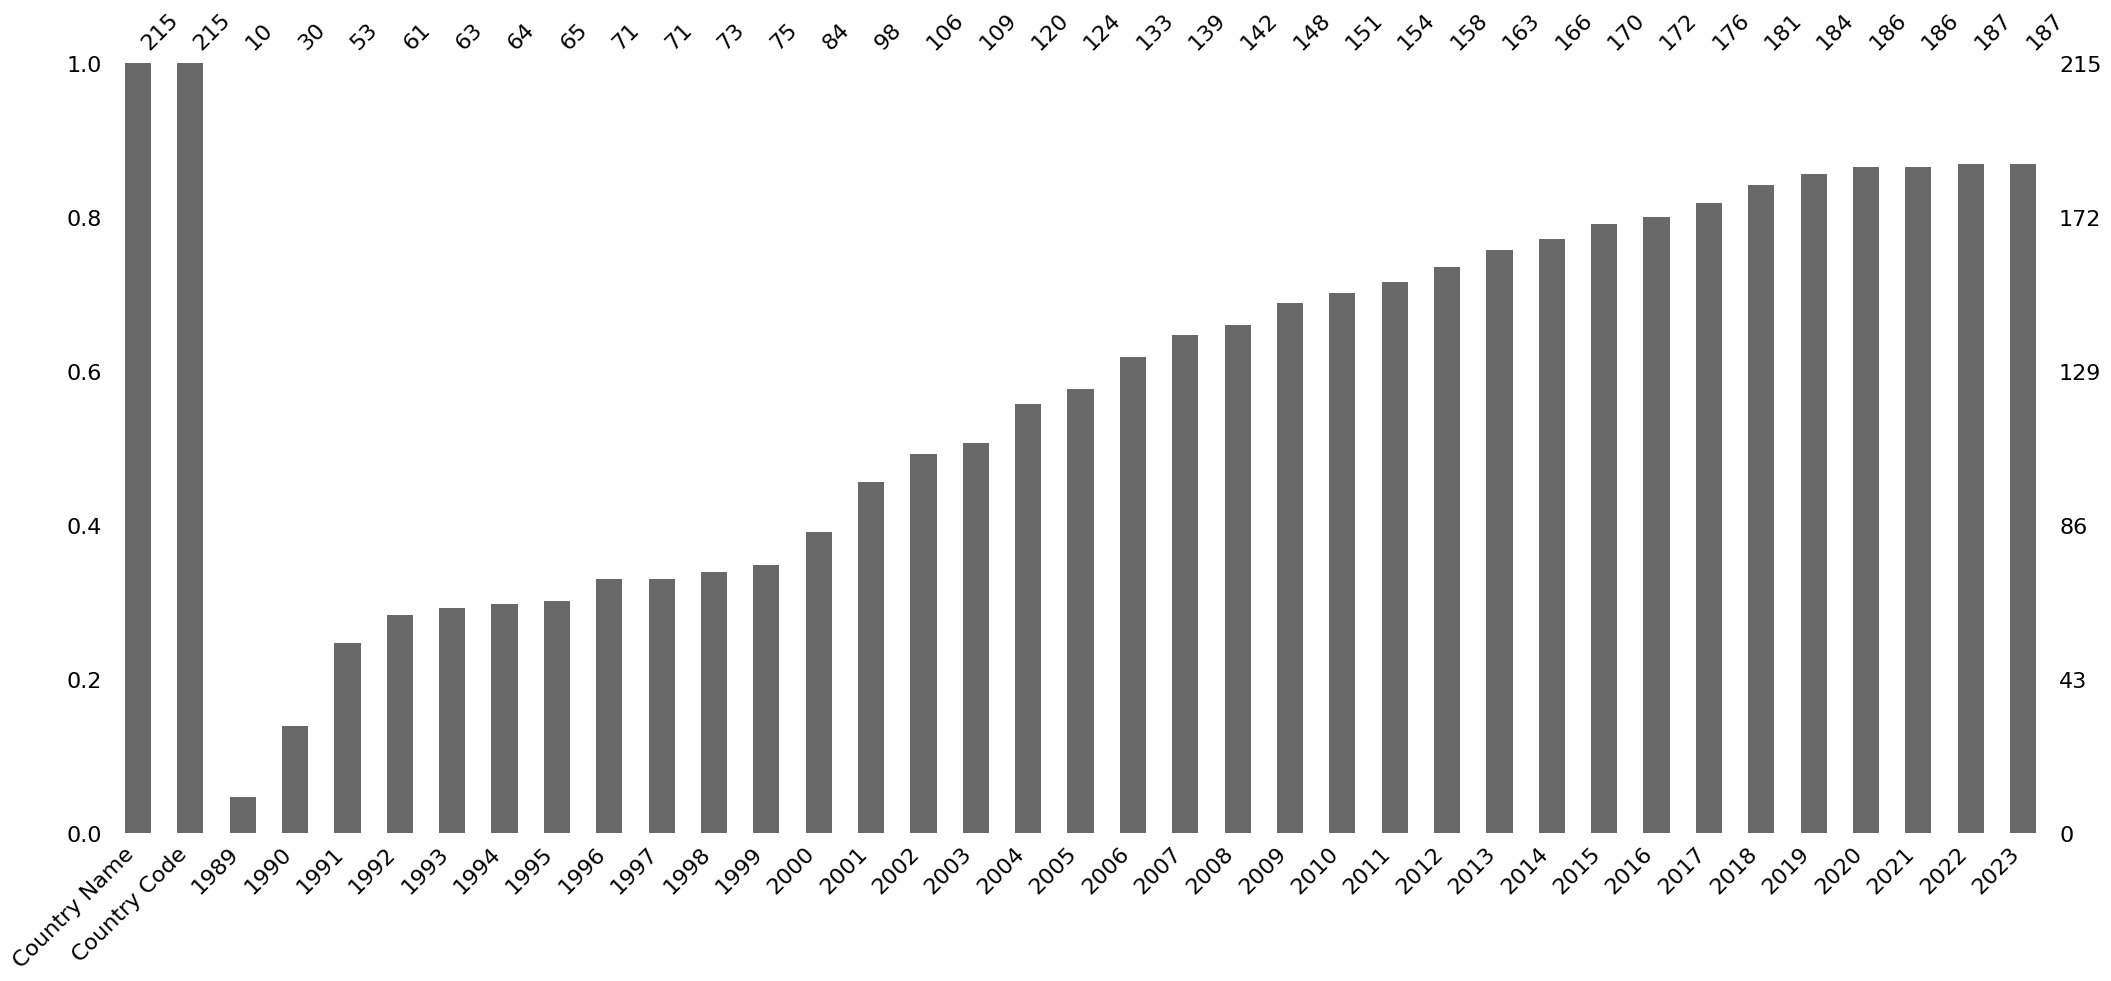

In [32]:
# Visualize missing values as a matrix
msno.bar(education_df)


In [ ]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Iterate over each country
for country_name, country_data in education_df.groupby('Country Name'):
    # Plot the education level over the years
    plt.plot(education_df.columns[4:], country_data.iloc[:, 4:].values.flatten(), label=country_name)

# Set labels and title
plt.title('Education Level Over the Years')
plt.xlabel('Year')
plt.ylabel('Education Level (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Move legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\troen\AppData\Local\Temp\ipykernel_18556\4038214812.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


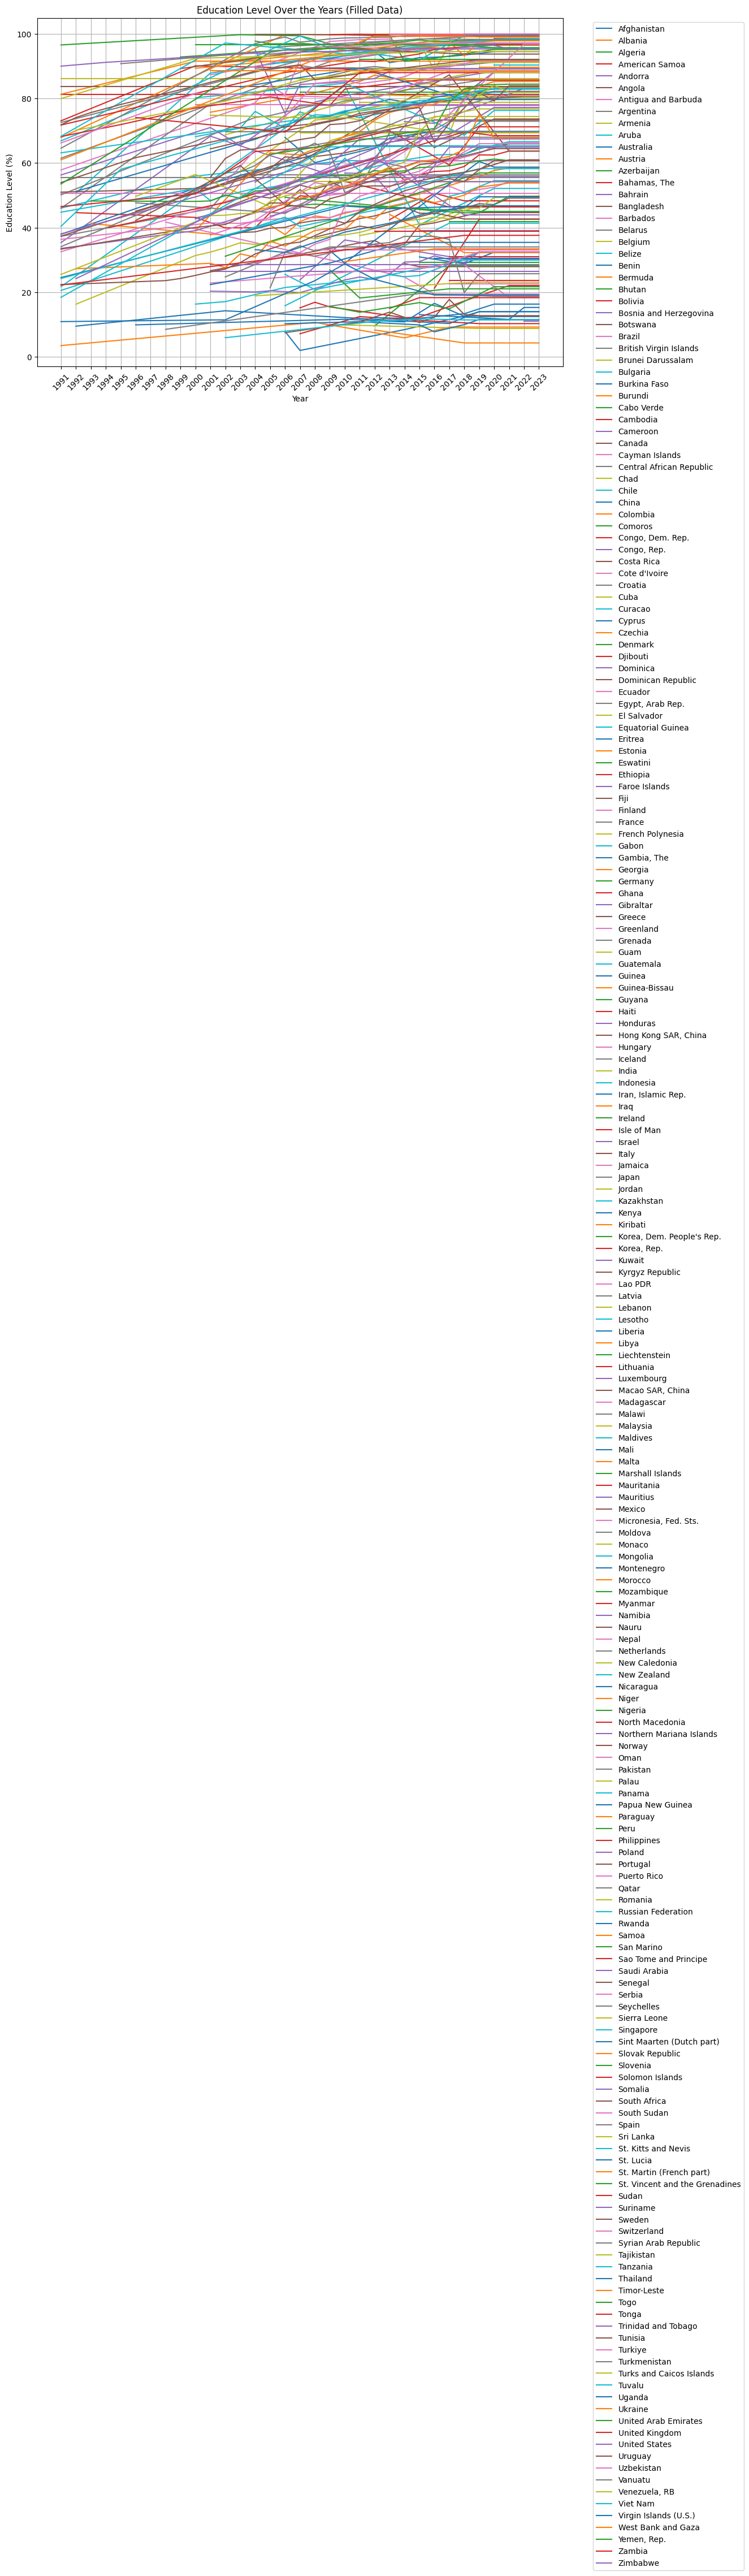

In [31]:
# Trying something for the missing data
for country_name, country_data in education_df.groupby('Country Name'):
    # Interpolate missing values using linear interpolation
    education_df.loc[education_df['Country Name'] == country_name, '1989':'2023'] = country_data.loc[:, '1989':'2023'].interpolate(method='linear', axis=1)

# Set the figure size
plt.figure(figsize=(12, 8))

# Iterate over each country
for country_name, country_data in education_df.groupby('Country Name'):
    # Plot the education level over the years
    plt.plot(education_df.columns[4:], country_data.iloc[:, 4:].values.flatten(), label=country_name)

# Set labels and title
plt.title('Education Level Over the Years (Filled Data)')
plt.xlabel('Year')
plt.ylabel('Education Level (%)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Move legend outside the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()